In [1]:
import matplotlib.pyplot as plt
import itertools
import random
import copy
import numpy as np

In [2]:
class Schelling:
    
    
    def __init__(self, height, width, empty_ratio, similarity_threshold, n_iterations, races):
        self.height = height
        self.width = width
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.races = races
        

    def populate(self):
        self.empty_houses = []
        self.agents = {}
        
        self.all_houses = list(itertools.product(range(self.width),range(self.height)))
        random.shuffle(self.all_houses)
        self.n_empty = int(self.empty_ratio * len(self.all_houses))
        self.empty_houses= self.all_houses[:self.n_empty]
        self.remaining_houses = self.all_houses[self.n_empty:]
        
        #assign 'race(i)' to 'houses(i + i*number of races)'
        houses_by_race = [self.remaining_houses[i::self.races] for i in range(self.races)]
        
        for i in range(self.races):
            #if n houses assigend to race(i), then n number of value 'i+1' will be generate in list 'race_numb[i]'
            race_numb = [i+1]*len(houses_by_race[i])
            self.agents.update(zip(houses_by_race[i], race_numb))
        
    def plot_city(self):
        fig, ax = plt.subplots(figsize=(self.width*0.5, self.height*0.5))
        ax.set_xlim([-1, self.width-1])
        ax.set_ylim([-1, self.height-1])
        ax.set_xticks(np.arange(0, self.width, 1))
        ax.set_yticks(np.arange(0, self.height, 1))
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticklabels([])
        ax.yaxis.set_ticks_position('none')
        ax.grid()
        cols = {0:'r', 1:'g', 2:'b', 3:'c', 4:'m', 5:'y', 6:'k'}           
        for key, value in self.agents.items():           
            x = key[0]-0.5
            y = key[1]-0.5
            ax.scatter(x, y, c=cols[value], marker='s', s=500)
    
    def is_unsatisfied(self, x, y):
        race = self.agents[(x,y)]
        same_race = 0
        diff_race = 0
        
        if x > 0 and y > 0 and (x-1, y-1) not in self.empty_houses:
            if self.agents[(x-1,y-1)] == race:
                same_race += 1
            else:
                diff_race += 1
            
        if x > 0 and (x-1, y) not in self.empty_houses:
            if self.agents[(x-1,y)] == race:
                same_race += 1
            else:
                diff_race += 1
        
        if x > 0 and y < (self.width-1) and (x-1, y+1) not in self.empty_houses:
            if self.agents[(x-1,y+1)] == race:
                same_race += 1
            else:
                diff_race += 1
            
        if y > 0 and (x, y-1) not in self.empty_houses:
            if self.agents[(x,y-1)] == race:
                same_race += 1
            else:
                diff_race += 1
        
        if y < (self.width-1) and (x, y+1) not in self.empty_houses:
            if self.agents[(x,y+1)] == race:
                same_race += 1
            else:
                diff_race += 1
            
        if x < (self.height-1) and y > 0 and (x+1, y-1) not in self.empty_houses:
            if self.agents[(x+1,y-1)] == race:
                same_race += 1
            else:
                diff_race += 1
        
        if x < (self.height-1) and (x+1, y) not in self.empty_houses:
            if self.agents[(x+1,y)] == race:
                same_race += 1
            else:
                diff_race += 1
            
        if x < (self.height-1) and y < (self.width-1) and (x+1, y+1) not in self.empty_houses:
            if self.agents[(x+1,y+1)] == race:
                same_race += 1
            else:
                diff_race += 1
                
        if same_race + diff_race == 0:
            return False
        elif same_race/(same_race + diff_race) < self.similarity_threshold:
            return True
        else:
            return False
        
    def update(self):
        for i in range(self.n_iterations):
            self.original_agents = copy.deepcopy(self.agents)
            
            for j in self.original_agents:
                if self.is_unsatisfied(j[0],j[1]) == True:
                    new_house = random.choice(self.empty_houses)
                    self.agents[new_house] = self.agents[j]
                    del self.agents[j]
                    self.empty_houses.remove(new_house)
                    self.empty_houses.append(j)
            
            if i==self.n_iterations-1:
                self.plot_city()
                
                
    def similarity(self):
        similarity_each_race = []
        for i in self.agents:
        
            x = i[0]
            y = i[1]
            race = self.agents[(x,y)]
            same_race = 0
            diff_race = 0
        
            if x > 0 and y > 0 and (x-1, y-1) not in self.empty_houses:
                if self.agents[(x-1,y-1)] == race:
                    same_race += 1
                else:
                    diff_race += 1
            
            if x > 0 and (x-1, y) not in self.empty_houses:
                if self.agents[(x-1,y)] == race:
                    same_race += 1
                else:
                    diff_race += 1
        
            if x > 0 and y < (self.width-1) and (x-1, y+1) not in self.empty_houses:
                if self.agents[(x-1,y+1)] == race:
                    same_race += 1
                else:
                    diff_race += 1
            
            if y > 0 and (x, y-1) not in self.empty_houses:
                if self.agents[(x,y-1)] == race:
                    same_race += 1
                else:
                    diff_race += 1
        
            if y < (self.width-1) and (x, y+1) not in self.empty_houses:
                if self.agents[(x,y+1)] == race:
                    same_race += 1
                else:
                    diff_race += 1
            
            if x < (self.height-1) and y > 0 and (x+1, y-1) not in self.empty_houses:
                if self.agents[(x+1,y-1)] == race:
                    same_race += 1
                else:
                    diff_race += 1
        
            if x < (self.height-1) and (x+1, y) not in self.empty_houses:
                if self.agents[(x+1,y)] == race:
                    same_race += 1
                else:
                    diff_race += 1
            
            if x < (self.height-1) and y < (self.width-1) and (x+1, y+1) not in self.empty_houses:
                if self.agents[(x+1,y+1)] == race:
                    same_race += 1
                else:
                    diff_race += 1
                
            similarity_each_race.append(float(same_race)/(same_race + diff_race))
            return sum(similarity_each_race)/len(similarity_each_race)
        
               
                

        
        
            
        
                                    


In [3]:
exmpl = Schelling(30,30,0.2,0.6,500,3)

In [4]:
exmpl.populate()
print(exmpl.agents)

{(9, 18): 1, (13, 1): 1, (7, 4): 1, (1, 28): 1, (14, 20): 1, (1, 10): 1, (21, 24): 1, (5, 7): 1, (19, 13): 1, (14, 9): 1, (16, 20): 1, (17, 22): 1, (23, 16): 1, (15, 17): 1, (18, 24): 1, (0, 15): 1, (6, 22): 1, (9, 25): 1, (17, 9): 1, (23, 12): 1, (17, 8): 1, (16, 12): 1, (29, 23): 1, (23, 18): 1, (29, 28): 1, (3, 25): 1, (21, 7): 1, (21, 13): 1, (1, 17): 1, (29, 25): 1, (26, 27): 1, (10, 7): 1, (21, 9): 1, (27, 20): 1, (4, 19): 1, (11, 24): 1, (20, 9): 1, (24, 29): 1, (11, 23): 1, (8, 26): 1, (28, 11): 1, (1, 15): 1, (8, 1): 1, (10, 13): 1, (4, 7): 1, (11, 25): 1, (19, 21): 1, (10, 10): 1, (16, 6): 1, (3, 27): 1, (26, 4): 1, (27, 17): 1, (10, 28): 1, (25, 16): 1, (29, 13): 1, (2, 18): 1, (2, 8): 1, (18, 11): 1, (16, 5): 1, (22, 13): 1, (18, 7): 1, (11, 22): 1, (14, 13): 1, (18, 27): 1, (22, 16): 1, (6, 12): 1, (4, 27): 1, (27, 5): 1, (1, 5): 1, (0, 8): 1, (17, 14): 1, (20, 17): 1, (0, 11): 1, (27, 29): 1, (24, 5): 1, (6, 7): 1, (21, 11): 1, (8, 8): 1, (11, 7): 1, (13, 18): 1, (3, 13):

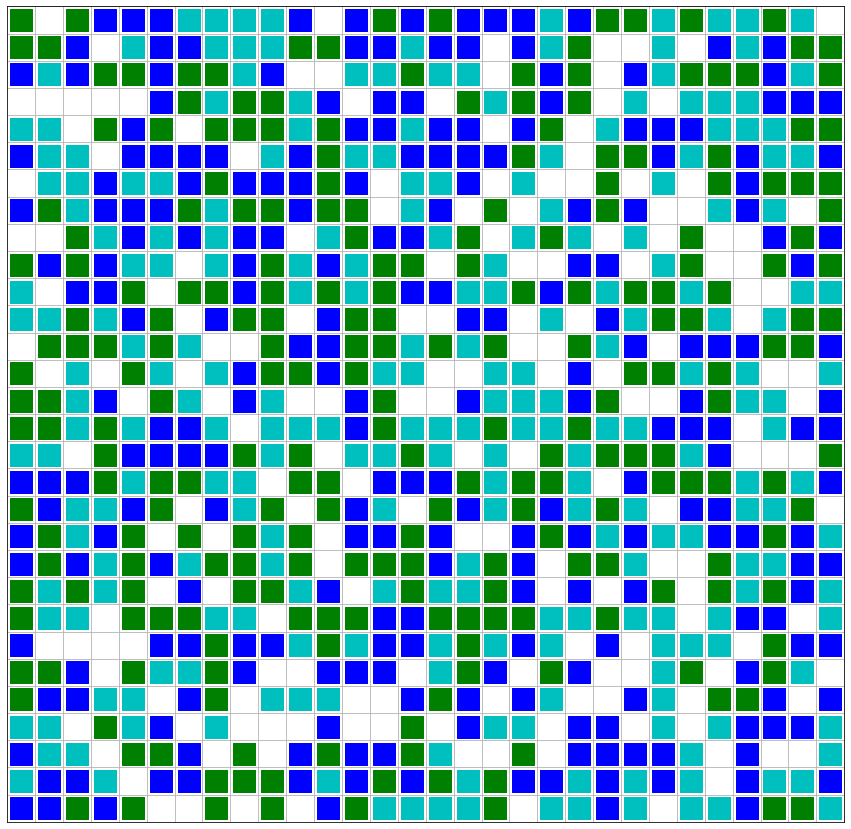

In [5]:
exmpl.plot_city()

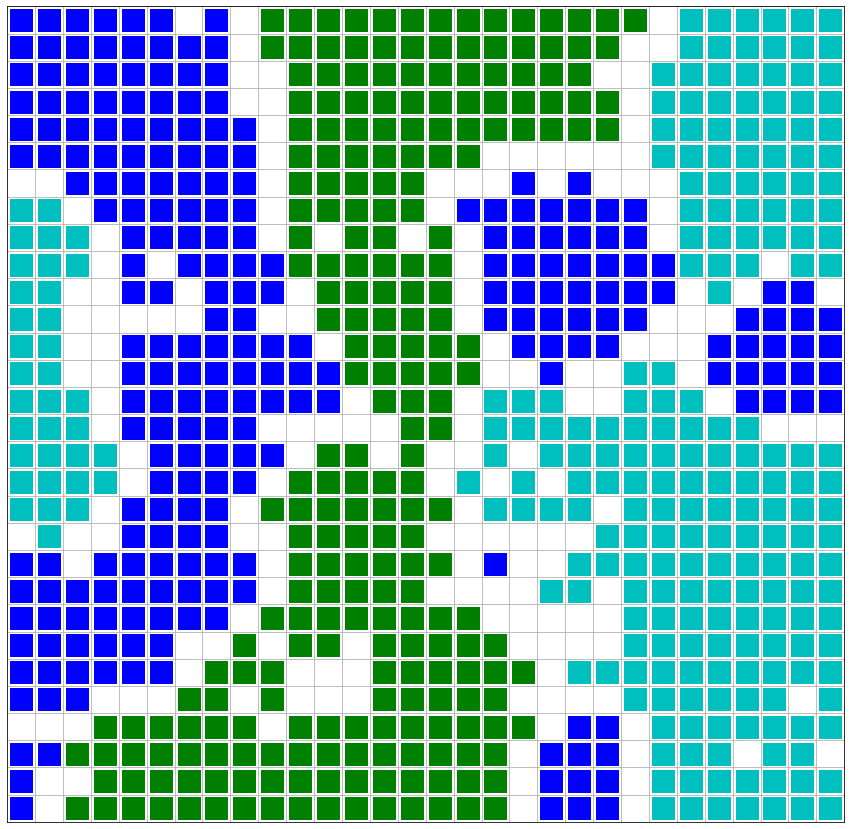

In [6]:
exmpl.update()

In [7]:
exmpl.similarity()

1.0